# Tasks 2 for phases 2 - Keziah

## Summary of dataset 

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('store_sales_part2.csv')
data.head(5)

,Ship Mode,Segment,Postal Code,Sub-Category,Sales,Quantity,Discount,Profit,Hierarchical_Encoded,season
0,2,0,-0.431061,0,0.458066,-0.712379,-0.937112,1.169318,15122,0
1,3,0,1.033744,2,-0.659835,2.126119,-0.937112,0.187242,3165,2
2,2,0,-1.147281,1,-0.541740,-0.712379,0.833765,-0.350410,35235,2
3,3,0,-1.147281,2,-0.264609,-0.144680,0.243472,0.235227,35235,0
4,3,2,0.634070,0,1.876763,-0.144680,0.951823,-1.977166,40131,3


The store_sales_part2 is the preprocessed store_sales data, and the variables are:

Season: Season of the order, categorical (encoded)[Spring=0 Autumn=1 Summer=2 Winter=3].

Ship Mode: Mode of shipping, categorical (encoded).

Segment: Customer segment, categorical (encoded).

Postal Code: Postal code, numerical.

Sub-Category: Sub-category of the product, categorical (encoded).

Sales: Sales amount, numerical.

Quantity: Quantity of products, numerical.

Discount: Discount applied, numerical.

Profit: Profit amount, numerical.

Hierarchical_Encoded: Hierarchical encoding for State and City, numerical.


##  Load and split preprocessed data

In [36]:
X = data.drop('Sales', axis=1)  # Assuming 'Sales' is the target variable
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X Training set shape:',X_train.shape)
print('X Testing set shape:',X_test.shape)

X Training set shape: (1277, 9)
X Testing set shape: (320, 9)


## Algorithm


In this project we will use Random Forest Regressor to make predictions.

### How It Works:
It creates Many Decision Trees: It builds many small models (decision trees) from random samples of the data.And it averages the results of all these models to make the final prediction.

### Why Random Forest Regressor 

This dataset contains various features like 'Order Date', 'Ship Mode', 'Segment', 'Quantity', etc. Random Forest can easily handle and process these multiple features effectively, capturing complex interactions between them.

The relationships between features and the target variable (e.g., 'Profit') may not be straightforward or linear. Random Forest can model complex, non-linear relationships, making it suitable for such datasets.


## Train and test a model

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np
import seaborn as sns
from sklearn.tree import plot_tree

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

## Evaluate the model

In [48]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
print(f'Explained Variance Score: {explained_variance}')

Mean Squared Error: 0.4075424845354873
Mean Absolute Error: 0.36380179142304475
Root Mean Squared Error: 0.6383905423292918
R-squared: 0.6532137771377056
Explained Variance Score: 0.6536816383972157


MSE and RMSE indicate the magnitude of the prediction error. Lower values are better, and RMSE provides a more interpretable measure in the same units as the target variable. An MSE of 0.4075 means that, on average, the squared difference between the predicted and actual profit values is approximately 0.4075.

MAE provides an intuitive measure of the average magnitude of error and is less sensitive to outliers than MSE. An MAE of 0.3638 means that, on average, the predicted values are in the same units as the target variable (sales) and are approximately 0.3638 off.

R² and the explained variance score indicate that the model explains approximately 65% of the variability in the profit data.

#### Feature Importance Plot

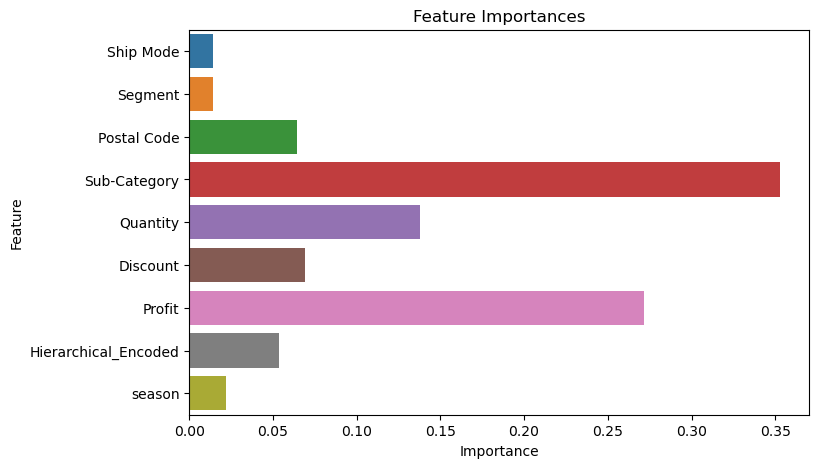

In [58]:
# Feature Importance Plot
plt.figure(figsize=(8, 5))
importances = rf.feature_importances_
feature_names = X.columns
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### Actual vs. Predicted Plot

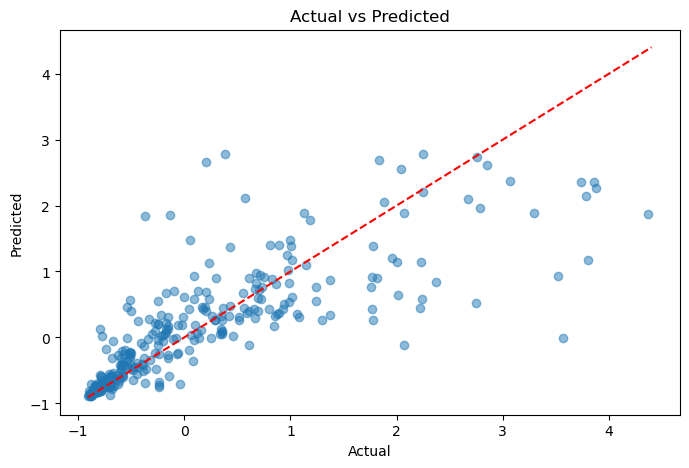

In [56]:
# Actual vs. Predicted Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

#### Residuals Plot

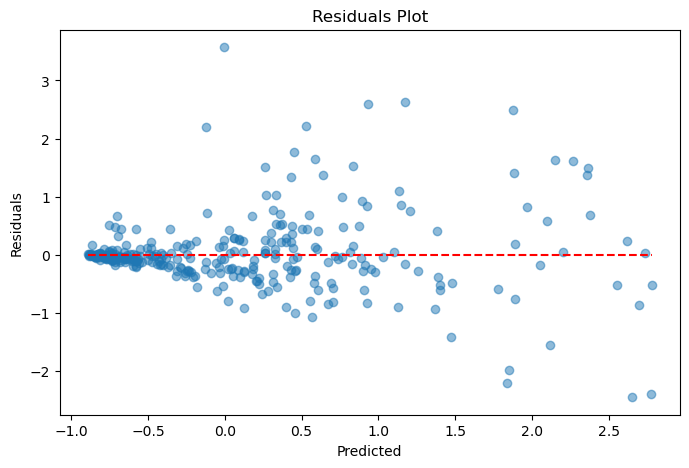

In [55]:
# Residuals Plot
plt.figure(figsize=(8, 5))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(0, y_pred.min(), y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Tunning parameters

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1200, num=12)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(100, 200, num=10)] + [None],
    'min_samples_split': [3, 5, 6, 7,10],
    'bootstrap': [True, False]
}
# Instantiate the model
rf = RandomForestRegressor(random_state=42)

# random research
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=150, cv=3, verbose=2, n_jobs=-1)
random_search.fit(X_train, y_train)

# best parameters
best_params = random_search.best_params_
print(f'Best parameters: {best_params}')

best_rf = random_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
explained_variance_rf = explained_variance_score(y_test, y_pred)

print(f'Mean Squared Error: {mse_rf}')
print(f'Mean Absolute Error: {mae_rf}')
print(f'Root Mean Squared Error: {rmse_rf}')
print(f'R-squared: {r2_rf}')
print(f'Explained Variance Score: {explained_variance_rf}')

Fitting 3 folds for each of 150 candidates, totalling 450 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 6, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Mean Squared Error: 0.4227010098869104
Mean Absolute Error: 0.3724613076853281
Root Mean Squared Error: 0.6501546046033285
R-squared: 0.6403150783510652
Explained Variance Score: 0.6536816383972157


In [67]:
print(f'Mean Squared Error Before Tunning parameters: {mse}')
print(f'Mean Absolute Error Before Tunning parameters: {mae}')
print(f'Root Mean Squared Error Before Tunning parameters: {rmse}')
print(f'R-squared Before Tunning parameters: {r2}')
print(f'Explained Variance Score Before Tunning parameters: {explained_variance}')

Mean Squared Error Before Tunning parameters: 0.4075424845354873
Mean Absolute Error Before Tunning parameters: 0.36380179142304475
Root Mean Squared Error Before Tunning parameters: 0.638272289218586
R-squared Before Tunning parameters: 0.6532137771377056
Explained Variance Score Before Tunning parameters: 0.6536816383972157


## Summary

The model performs well, explaining 65% of the variance, and the prediction results are relatively accurate. "Sub-Category" and "Profit" are the most critical features, followed by "Quantity", while "Ship Mode", "Segment" and "season" have little impact on the prediction. The actual and predicted values are mostly close, but there is a small deviation. The residuals are randomly distributed, and most of them are concentrated near zero, indicating that there is no systematic deviation in the model error and the overall prediction performance is stable.

### Bounus

## Neural Network

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define Neural Network model
def create_nn_model(input_shape):
    model = Sequential()
    model.add(Dense(64, input_dim=input_shape, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])
    return model

# Train Neural Network
nn_model = create_nn_model(X_train.shape[1])
nn_model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=0)

# Evaluate Neural Network
y_pred_nn = nn_model.predict(X_test).flatten()

mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f'Neural Network - MSE: {mse_nn}, MAE: {mae_nn}, R2: {r2_nn}')

C:\Users\28612\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step
Neural Network - MSE: 7.86578698677279, MAE: 2.2719485411167275, R2: -5.693158780958458


## Gradient Boosting

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

# Evaluate Gradient Boosting
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'Gradient Boosting - MSE: {mse_gbr}, MAE: {mae_gbr}, R2: {r2_gbr}')


Gradient Boosting - MSE: 0.38181221609408017, MAE: 0.37063420567782074, R2: 0.6751081880141537


From the above two models, Gradient Boosting Regressor performs best, with an R2 value of 0.02. MSE and MAE also decrease by about 0.02.